In [3]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
warnings.filterwarnings('ignore')

In [4]:
#Importing csv file
df=pd.read_csv("Desktop\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


###### EDA

Let us try to find out the shape of our data

In [5]:
df.shape

(8124, 23)

so our data set has 8124 rows  and 23 columns

Now let us print out the type of each data

In [6]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

So all the data in our data is categorical or which is object type so iam using isnull function to find out the null values

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

###### So there are no null values  here so we can proceed

Here our Target variable is class  and there are two types p(poisnous) and e(edible) so now lets print out the count of Poisnous and edible mushrooms in our dataset

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

So we have 4208 edibile Mushrooms and 3916 poisnous mushrooms.So now iam using Count plot to find out is there in any class imbalance

<AxesSubplot:xlabel='class', ylabel='count'>

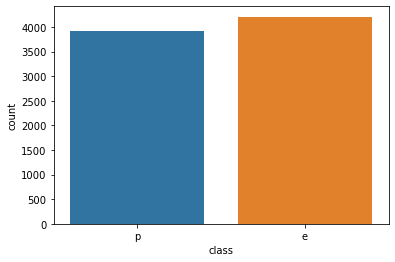

In [9]:
sn.countplot(df['class'])

So there is a less variance in the give count so we can proceed

Our data set has categorical data so in order to check distributaion so iam using Encoder technique to Change it to Normal data

In [10]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column]=labelencoder.fit_transform(df[column])

now let us describe the data to find any null values

In [11]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


by using the describe function we were able to find that vail type coloumn is not useful as all the data in it is zero so dropping of that column from our data set.

In [12]:
df=df.drop(columns=['veil-type'])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


now let us Do Univariant analysis to find out the Distribution for this iam using Distplot

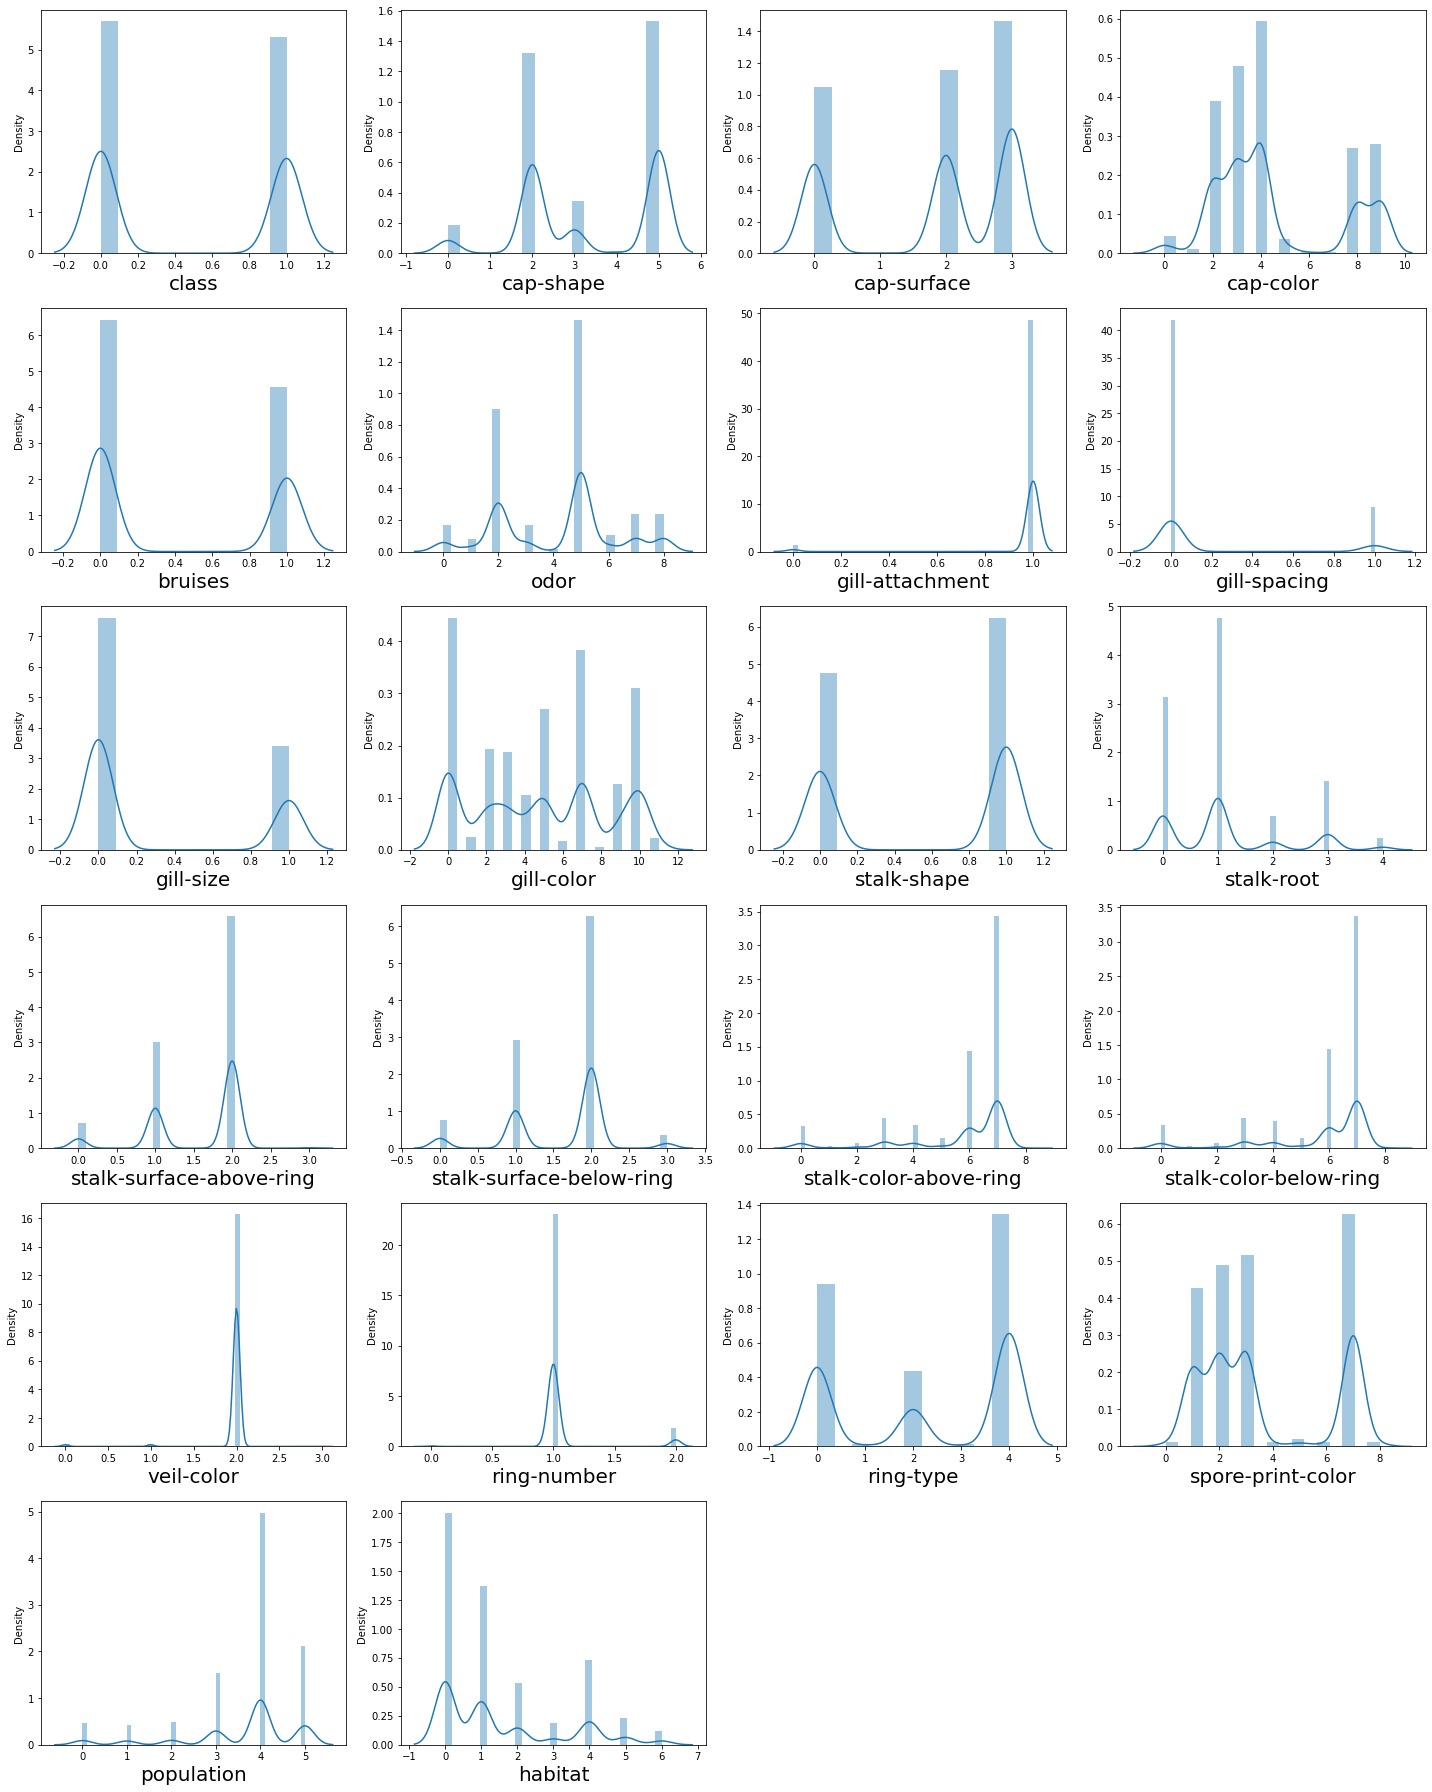

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.tight_layout()

As the above output shows most the fields are not evenly distributed except the ring number so now let us use box plots to find the outliers.

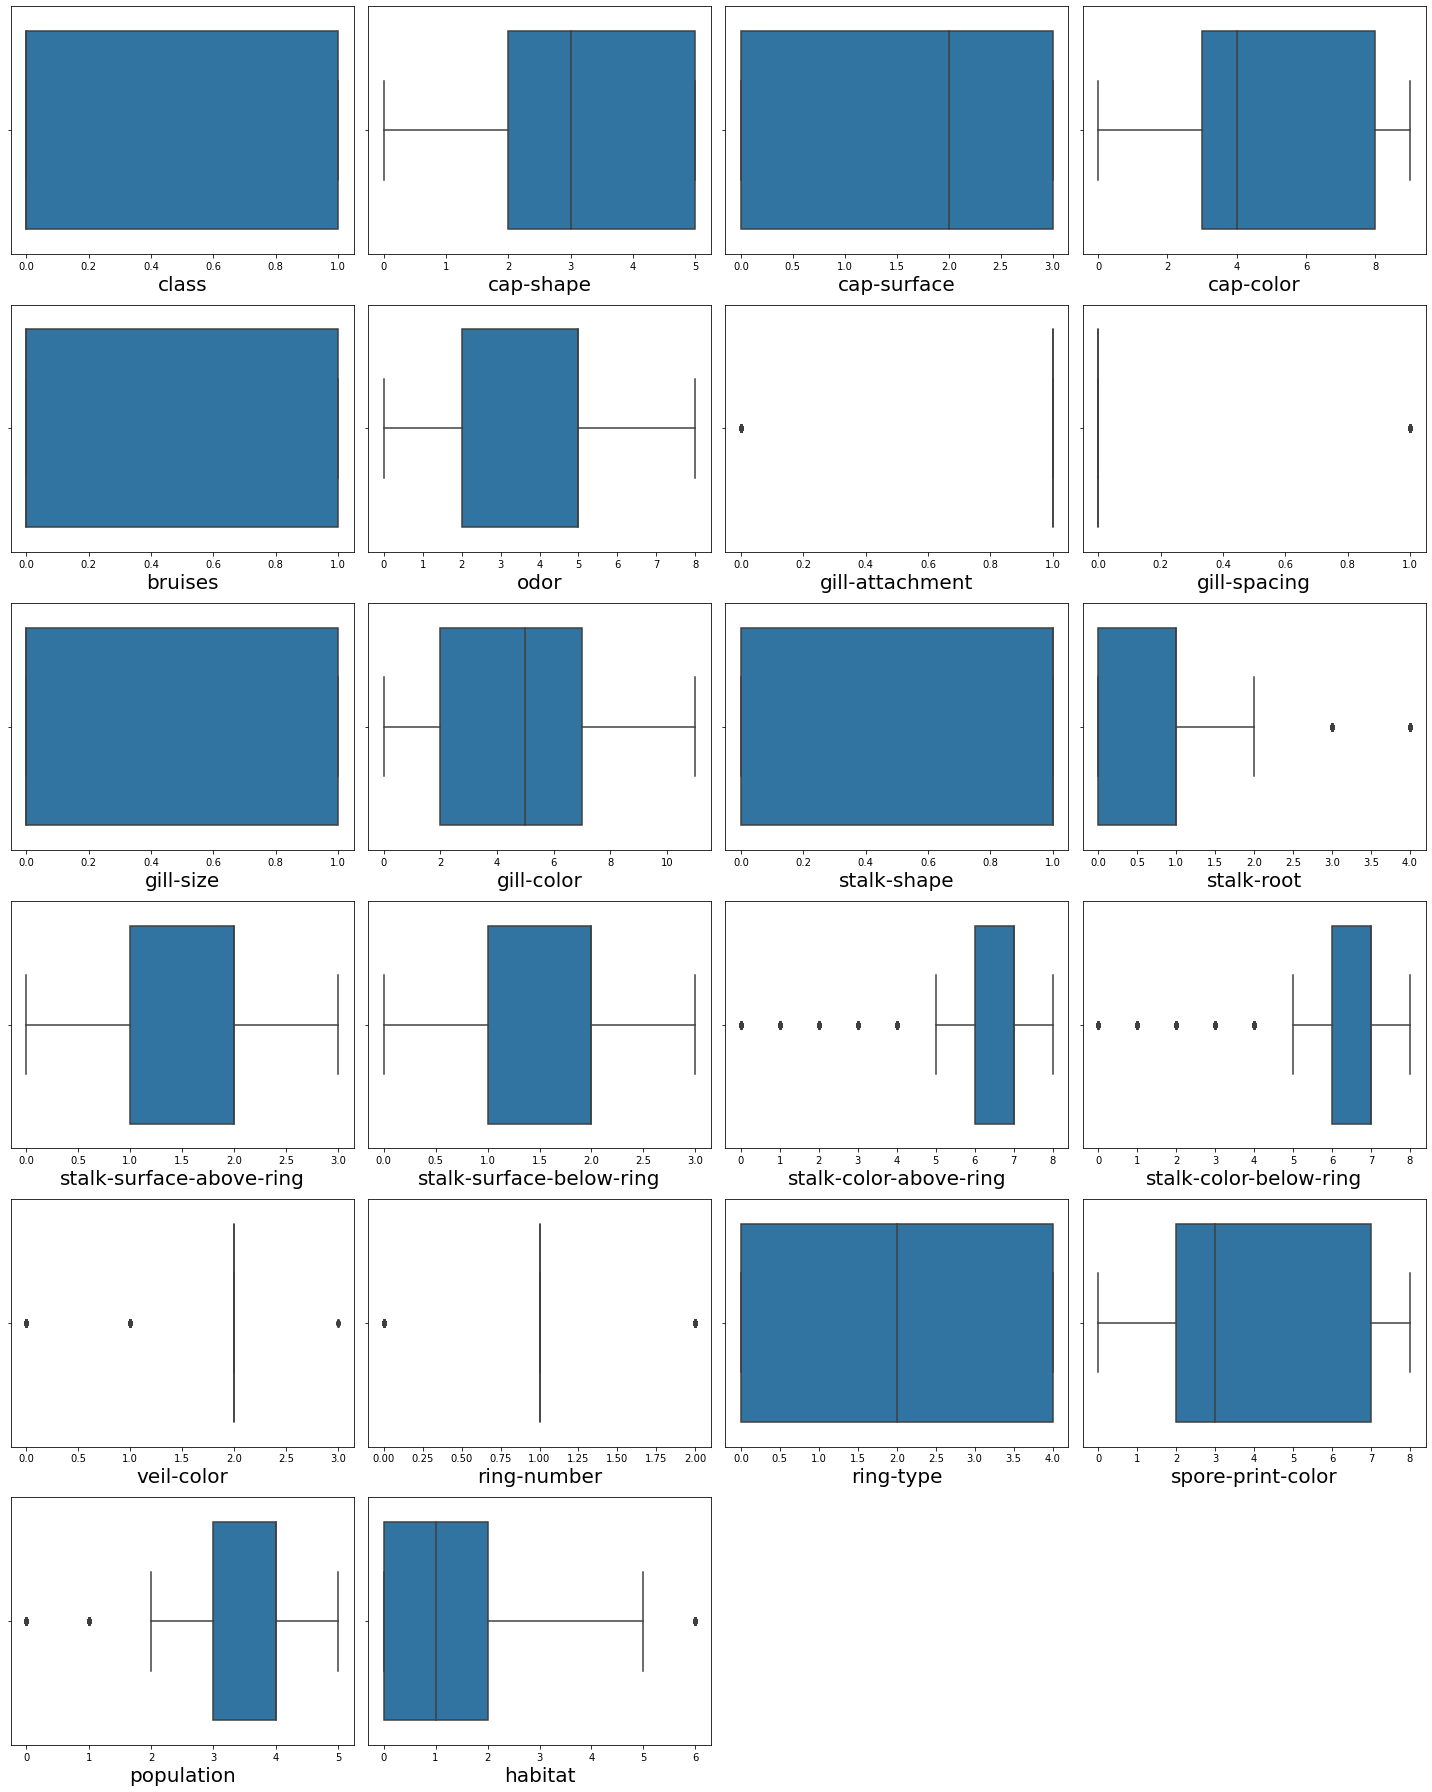

In [14]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sn.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.tight_layout()

As shown in the above figures the fileds gill-attachment,gill-spacing,stalk root,stalk-color-above-ring,stalk-color-belowring,veil-color,ring-number,population and habitat are having outliers which need to be removed.

Now let us do Multi variant analysis to find the relation between two features for this let us split our data in to two.

In [15]:
y=df['class']
x=df.drop(columns=['class'],axis=1)

In [16]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [17]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


Here we have splitted our data in to two filed where our Target variable is stored in Y and remaining are stored in X.

Now let us plot the Distribution our data after splitting.

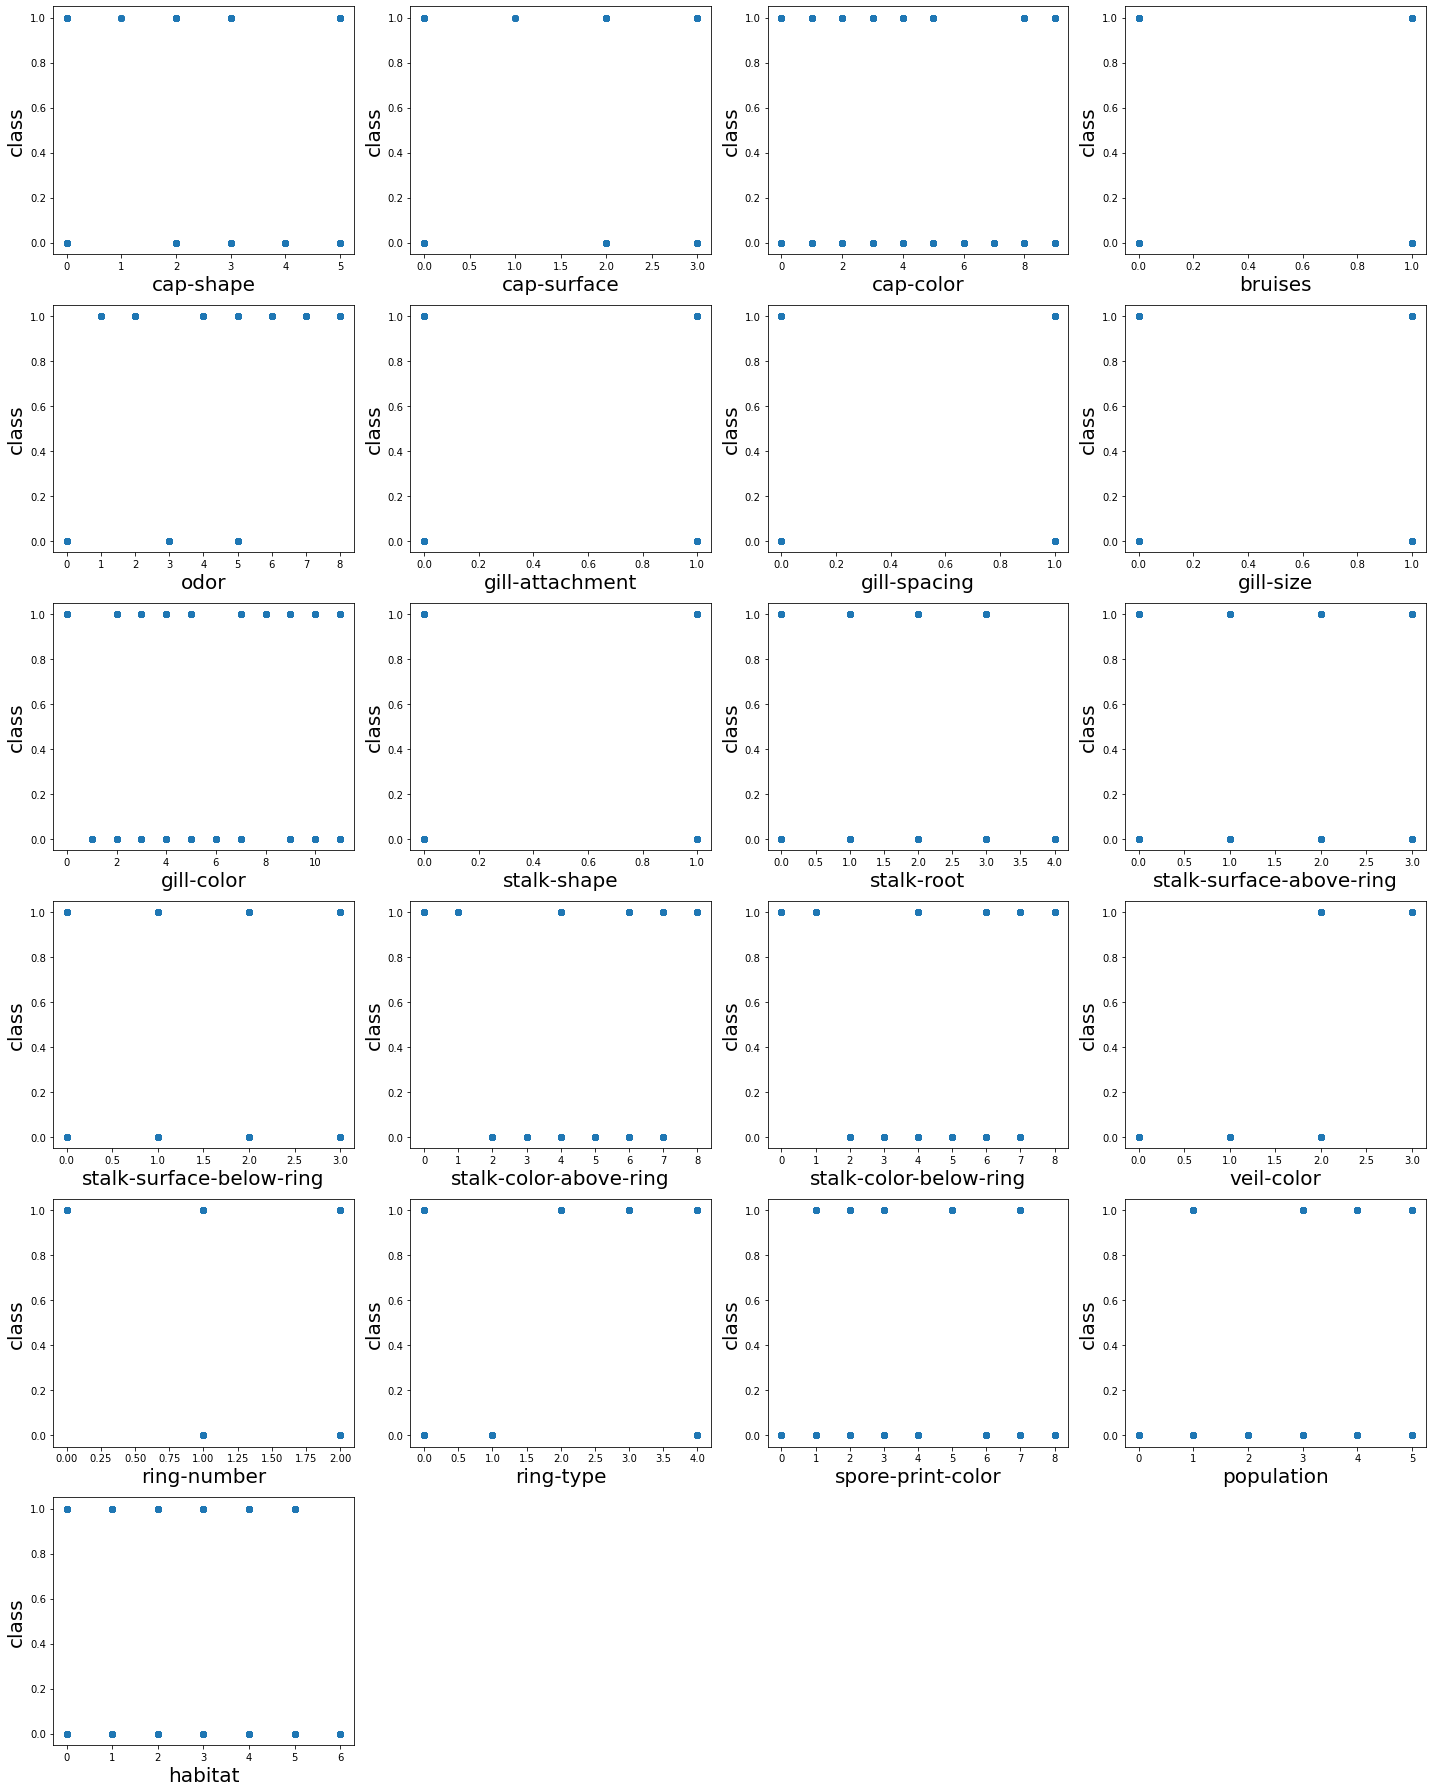

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('class',fontsize=20)
    plotnumber+=1
plt.tight_layout()

As the Bi variant analysis is giving a non liner relationship

In multivariant analysis iam using heat map to identifty the least realted data

In [19]:
cor=df.corr()

In [20]:
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

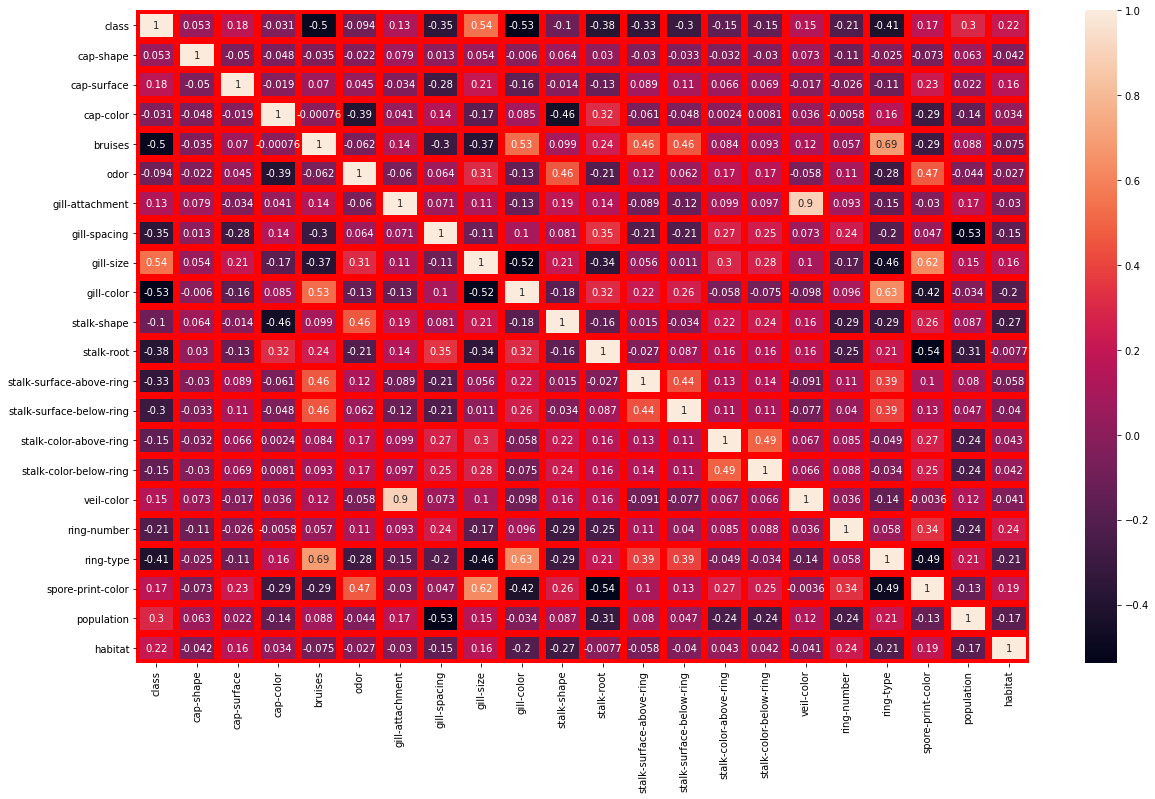

In [75]:
plt.figure(figsize=(20,12))
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

From the above heatmap i was able to find that the gill color has the least co-relation with our Target variable

As the data set is categorical we will not remove the outliers And skewness

###### Model building

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Finding the best random state

In [22]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is:",maxAccu,"on Random state:",maxRs)

Best Accuracy is: 1.0 on Random state: 1


So it gives us 100% accuracy with Best random state 1

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRs)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [24]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [25]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [27]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



Upon reviewing the above outputs the Random forest classifier and Decision tree classifier gave us 100% accuracy where as Support vector classifier gave us only 99% accuracy.So to choose the best model we will use cross validation Score.

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.9211962106858659


In [30]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8910292535051155


In [31]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.8420306934444864


So after performing the Cross validation I was able to identify that the DTC (Decision Tree Classifier) gives me the highest score.So after comparing the Cross valid scores with the Accuracy Scores i was able to consider that Decision Tree classifier is the best model.So now i will be doing Hyper parameter tuning on Decision Tree Classifier

###### Hyper Parameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameter={'max_depth':np.arange(2,50),'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [37]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [38]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [39]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto'}

In [41]:
Final_mod=DecisionTreeClassifier(criterion='entropy',max_depth=13,max_features='log2')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


###### After doing Hyper parmater Tuning were are able to find that the Decision Tree classifier Gives us 100% accuracy

In [44]:
import joblib
joblib.dump(Final_mod,"Finalmodel.pkl")

['Finalmodel.pkl']

In [45]:
mod=joblib.load("Finalmodel.pkl")
print(mod.predict(x_test))

[0 0 0 ... 1 0 0]
